In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as skl

In [2]:
def castMatrix(data, dtype=int):
    return list(map(lambda sub: list(map(dtype, sub)), data))

def translation(x):
    dict = {'noMatch' : 0, 0 : 'noMatch', 'relatedMatch' : 1, 1 : 'relatedMatch', 'exactMatch' : 2, 2 : 'relatedMatch'}
    return dict[x]

### 1.1 Suggestions (N=1)

In [3]:
stats = castMatrix(np.loadtxt('results_accs.txt'))
halfaccs = list(map(int, np.loadtxt('results_halfaccs.txt')))
mrrs = list(np.loadtxt('results_mrrs.txt'))

### 1.2 Suggestions (N=3)

In [3]:
stats = castMatrix(np.loadtxt('results_accs3.txt'))
halfaccs = list(map(int, np.loadtxt('results_halfaccs3.txt')))

### 1.3 Suggestions (N=5)

In [9]:
stats = castMatrix(np.loadtxt('results_accs5.txt'))
halfaccs = list(map(int, np.loadtxt('results_halfaccs5.txt')))

In [3]:
stats = castMatrix(np.loadtxt('results_alt.txt'))

In [4]:
stats

[[0, 0, 67], [574, 574, 152], [0, 0, 355], [0, 0, 0]]

### 2. Visualize results

In [5]:
models = ['Levenshtein','LCS','Word2Vec']
cutoffs = np.arange(1,10,1)/10
N = 574
cutoffs

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [6]:
true_positives = []
false_positives = []
false_negatives = []
true_negatives = []
g_acc = []
mrr_score = []

#m = max(halfaccs)

for i,_ in enumerate(models):
    true_positives.append(stats[0][i::len(models)])
    false_positives.append(stats[1][i::len(models)])
    false_negatives.append(stats[2][i::len(models)])
    true_negatives.append(stats[3][i::len(models)])
    #g_acc.append(halfaccs[i::len(models)])
    #mrr_score.append(mrrs[i::len(models)])

total_positive = np.add(true_positives,true_negatives)

In [12]:
print(f"TP: {true_positives[2][6]}, TN: {true_negatives[2][6]}, FP: {false_positives[2][6]}, FN: {false_negatives[2][6]}, Acc: {(true_positives[2][6]+true_negatives[2][6])/574}")

TP: 6, TN: 86, FP: 213, FN: 269, Acc: 0.1602787456445993


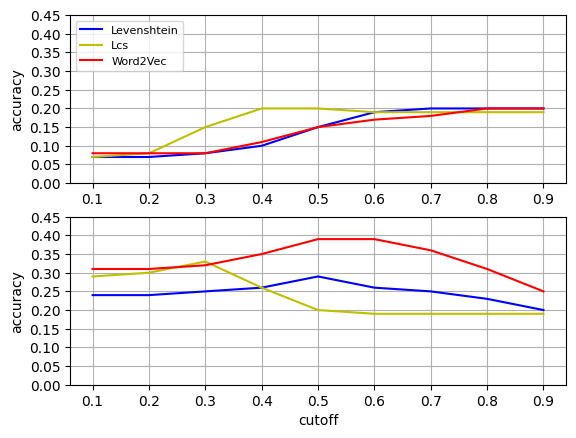

In [11]:
fig,axs = plt.subplots(2)
for index,i in enumerate([total_positive,g_acc]):
    axs[index].plot(cutoffs,[round(j/N,2) for j in i[0]],'b-', label='Levenshtein',)
    axs[index].plot(cutoffs,[round(j/N,2) for j in i[1]], 'y-', label='Lcs')
    axs[index].plot(cutoffs,[round(j/N,2) for j in i[2]], 'r-', label='Word2Vec')
    
    axs[index].set_yticks(np.arange(0, 0.5, 0.05))
    axs[index].grid()

axs[0].legend(loc=2,prop={'size':8})
axs[1].set(xlabel='cutoff', ylabel='accuracy')
axs[0].set(ylabel='accuracy')


plt.show()

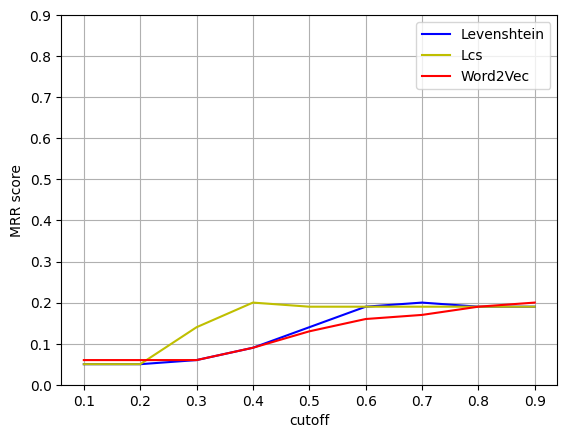

In [6]:
fig,axs = plt.subplots()
axs.plot(cutoffs,[round(j/N,2) for j in mrr_score[0]], 'b-', label='Levenshtein')
axs.plot(cutoffs,[round(j/N,2) for j in mrr_score[1]], 'y-', label='Lcs')
axs.plot(cutoffs,[round(j/N,2) for j in mrr_score[2]], 'r-', label='Word2Vec')
axs.set(xlabel='cutoff', ylabel='MRR score')
axs.set_yticks(np.arange(0, 1, 0.1))
axs.grid()
axs.legend()

plt.show()

### 3. Precision & Recall on Match v NoMatch

In [12]:
results = {}
precision_list = []
recall_list = []

for i,_ in enumerate(models):
    model_precision = []
    model_recall = []
    print(f'Model: {models[i]}')
    for tp,fp,fn,tn in zip(true_positives[i],false_positives[i],false_negatives[i],true_negatives[i]):
        print(tp+fp+fn+tn)
        # precision & recall
        try:
            precision = (tp+tn)/(tp+tn+fp)
        except:
            precision = 0
        try: 
            recall = (tp+tn)/(tp+tn+fn)
        except:
            recall = 0

        model_precision.append(round(precision,2))
        model_recall.append(round(recall,2))
        """
        try:
            precision2 = tn/(tn+fn)
        except:
            precision2 = 0

        try:
            recall2 = tn/(tn+fp)
        except:
            recall2 = 0
        """
        print(f'Precision: {round(precision,3)}; Recall: {round(recall, 3)}')
        #(f'Precision: {round(precision,2)}; Recall: {round(recall, 2)} \t| Precision: {round(precision2,2)}; Recall: {round(recall2, 2)} ')  
    precision_list.append(model_precision)
    recall_list.append(model_recall)

Model: Levenshtein
574
Precision: 0.0; Recall: 0
Model: LCS
574
Precision: 0.0; Recall: 0
Model: Word2Vec
574
Precision: 0.306; Recall: 0.159


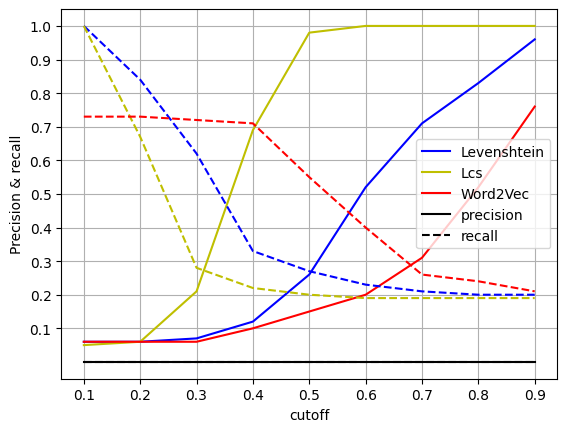

In [49]:
fig,axs = plt.subplots()
axs.plot(cutoffs,precision_list[0], 'b-', label='Levenshtein')
axs.plot(cutoffs,precision_list[1], 'y-', label='Lcs')
axs.plot(cutoffs,precision_list[2], 'r-', label='Word2Vec')
axs.plot(cutoffs,[0,0,0,0,0,0,0,0,0], 'k-')
axs.plot(cutoffs,[0,0,0,0,0,0,0,0,0], 'k--')
axs.plot(cutoffs,recall_list[0], 'b--', label='Levenshtein2')
axs.plot(cutoffs,recall_list[1], 'y--', label='Lcs2')
axs.plot(cutoffs,recall_list[2], 'r--', label='Word2Vec2')
axs.set(xlabel='cutoff', ylabel='Precision & recall')
axs.set_yticks(np.arange(0.1, 1.1, 0.1))
axs.grid()

axs.legend(['Levenshtein', 'Lcs', 'Word2Vec', 'precision', 'recall'])

plt.show()

In [7]:
def to_latex_tabular(data={'python' : [1,2], 'is' : [4,5], 'cool' : [7,8]}, labels=['hello', 'world']):
     
     header = ' & '.join([''] + [str(x) for x in labels]) + ' \\\\'
     t = '{' +  '|'.join(['r'] + ['l'] * len(labels)) + '}'
          
     y_axis = data.keys()
     lines = []
     for y in y_axis:
          lines.append(' & '.join(map(str, [y] + data[y])) + ' \\\\')
     
     stats = '\n\t  '.join(lines)

     head = f'''
     \\begin{{table}}[ht]
          \\centering
          \\begin{{tabular}}{t}
     '''

     core= f'''
          {header}
          \\hline
          {stats}
     '''
          
     tail = f'''
          \\end{{tabular}}
          \\caption{{some name}}
          \\label{{some:label}}
     \\end{{table}}
     '''
     print(head+core+tail)

In [29]:
to_latex_tabular(data={'Precision': precision_list[2], 'Recall': recall_list[2]},labels=['Cutoff', 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])


     \begin{table}[ht]
          \centering
          \begin{tabular}{r|l|l|l|l|l|l|l|l|l|l}
     
           & Cutoff & 0.1 & 0.2 & 0.3 & 0.4 & 0.5 & 0.6 & 0.7 & 0.8 & 0.9 \\
          \hline
          Precision & 0.08 & 0.08 & 0.09 & 0.14 & 0.23 & 0.33 & 0.47 & 0.75 & 1.0 \\
	  Recall & 0.78 & 0.78 & 0.77 & 0.75 & 0.59 & 0.43 & 0.28 & 0.25 & 0.21 \\
     
          \end{tabular}
          \caption{some name}
          \label{some:label}
     \end{table}
     


In [10]:
{'python' : [1,2,3], 'is' : [4,5,6], 'cool' : [7,8,9]}.keys()

dict_keys(['python', 'is', 'cool'])